In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV


In [3]:
df=pd.read_csv("/Users/alejandraossayepes/Library/CloudStorage/OneDrive-MIC/00_Maestria/14 Proyecto_1/Modulo_3/proyecto-prediccion-diabtes/proyecto-prediccion-diabtes/data/raw/diabetes.csv")

In [4]:
target_name='Outcome'
y= df[target_name]#given predictions - training data 
X=df.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [6]:
X_train.shape,y_train.shape

((614, 8), (614,))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.71      0.62      0.66        47

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154


 F1:
 0.6590909090909092

 Precision score is:
 0.7073170731707317

 Recall score is:
 0.6170212765957447

 Confusion Matrix:



<Axes: >

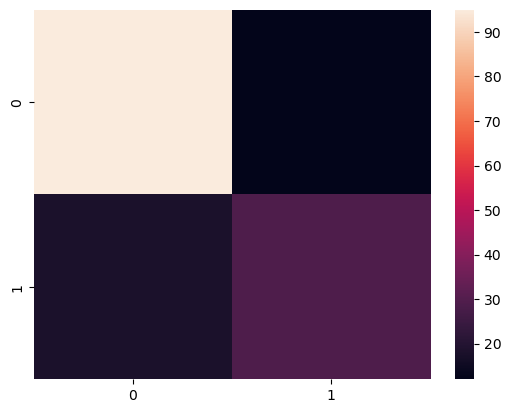

In [7]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
best_model = grid_search.fit(X_train,y_train)
knn_pred = best_model.predict(X_test)


print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

Fitting 4 folds for each of 40 candidates, totalling 160 fits
Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86       107
           1       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



<Axes: >

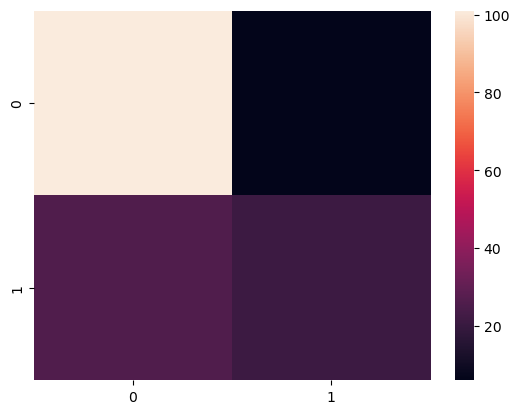

In [8]:
dt = DecisionTreeClassifier(random_state=42)
params = {'max_depth': [5, 10, 20,25], 'min_samples_leaf': [10, 20, 50, 100,120],'criterion': ["gini", "entropy"]}
grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
best_model=grid_search.fit(X_train, y_train)
dt_pred=best_model.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154


 F1:
 0.6590909090909092

 Precision score is:
 0.7073170731707317

 Recall score is:
 0.6170212765957447

 Confusion Matrix:



<Axes: >

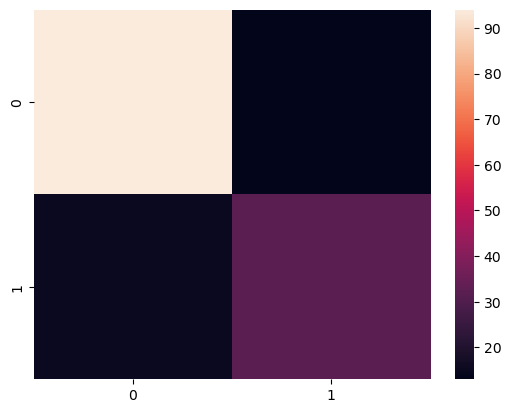

In [9]:
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

best_model = grid_search.fit(X_train, y_train)
rf_pred = best_model.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_pred))